<a href="https://colab.research.google.com/github/bbouya/Traffic_Sign_Classification/blob/main/Traffic_Sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"imaginationnano","key":"e70d1eb31f1be889159f68acc96f3cb8"}'}

In [15]:
# we will start connecting to our kaggle API acounts
!pip install -q kaggle
#installing kaggle using API

In [16]:
#The kaggle API client expect this files to be in ~/.kaggle
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on kaggle tool startup
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory


In [35]:
#Creating a folder  and changing the curent working directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset


/traffic_sign_dataset


In [18]:
%ls

In [20]:
#Searching for a dataset in kaggle
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          41933  
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           6761  
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            220  
valentynsichkar/traffic-signs-1-million-images-for-classification  Traffic Signs 1 million images for Classification   20GB  2021-02-08 16:45:43            161  
valentynsichkar/preprocessed

In [34]:
%cd traffic_sign_dataset/

[Errno 2] No such file or directory: 'traffic_sign_dataset/'
/


In [37]:
# Dawnloading kaggle for the requied dataset using search option.we can also use different search options like searching competitions, notebooks, kernels, datasets, etc
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

100% 609M/612M [00:04<00:00, 136MB/s]
100% 612M/612M [00:04<00:00, 139MB/s]
/


In [67]:
#After searching the data next step would be dawnloading the data into collab notebook using refereence found in search option
%ls


gtsrb-german-traffic-sign.zip


In [68]:
# Unzipping


!unzip gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00024.png 

In [65]:
%ls

gtsrb-german-traffic-sign.zip


/root


In [69]:
#after we unzip the file from the dataset.zip 
#Importation the library to start preprocessing the data
import os 
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D

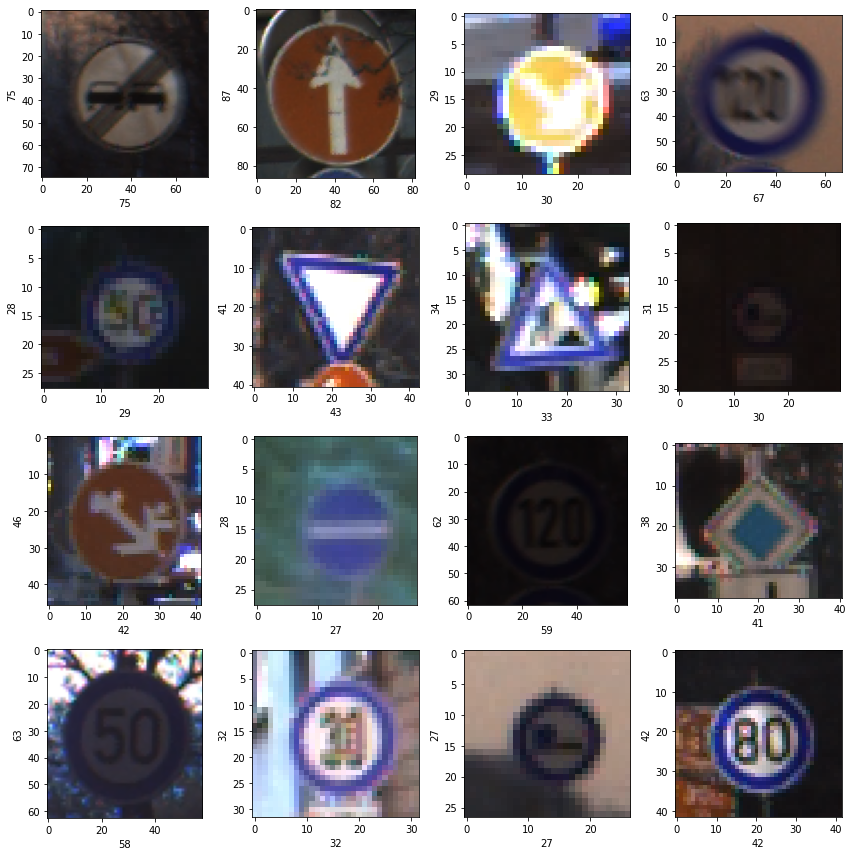

In [73]:
# Plotting 12 Images to chack dataset
import cv2
plt.figure(figsize=(12,12))
path = 'traffic_sign_dataset/Test'

for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = cv2.imread(path + '/' + random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)# width image
  plt.ylabel(rand_img.shape[0], fontsize = 10)# height of image

